In [1]:
from model.detr import DETR
import torch
import torchvision.transforms as T
from PIL import Image
import requests
from utils import get_transform, check_image_size, rescale_bboxes, plot_results

In [2]:
%matplotlib inline

In [3]:
detr = DETR(num_classes=91)
state_dict = torch.hub.load_state_dict_from_url(
    url="https://dl.fbaipublicfiles.com/detr/detr_demo-da2a99e9.pth",
    map_location="cpu",
    check_hash=True,
)
detr.load_state_dict(state_dict)
out = detr.eval()

In [4]:
transform = get_transform()

In [5]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
im = Image.open(requests.get(url, stream=True).raw)

In [6]:
img = transform(im).unsqueeze(0)
check_image_size(img)

In [7]:
with torch.no_grad():
    outputs = detr(img)

In [8]:
probas = outputs["pred_logits"].softmax(-1)[0, :, :-1]
keep = probas.max(-1).values > 0.7

In [9]:
bboxes_scaled = rescale_bboxes(outputs["pred_boxes"][0, keep], im.size)

In [10]:
scores, boxes = probas[keep], bboxes_scaled

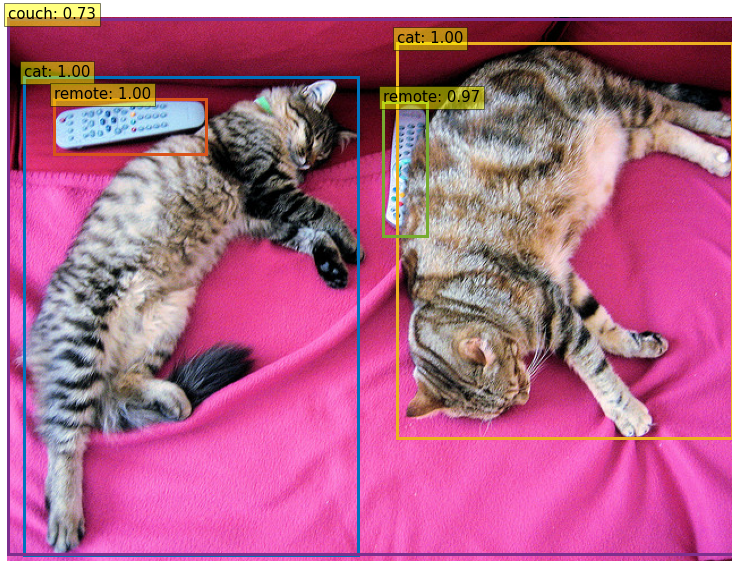

In [11]:
plot_results(im, scores, boxes)